In [23]:
#Importing of necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [24]:
#Loading dataset
df=pd.read_csv('D:\KasuleJassimKakandeRecessLearn_DataScience\churn-prediction-tf\data\Churn.csv')
df.head

<bound method NDFrame.head of      Customer ID  Gender  Senior Citizen Partner Dependents  tenure  \
0     7590-VHVEA  Female               0     Yes         No       1   
1     7590-VHVEG  Female               0     Yes         No       1   
2     5575-GNVDE    Male               0      No         No      34   
3     3668-QPYBK    Male               0      No         No       2   
4     7795-CFOCW    Male               0      No         No      45   
...          ...     ...             ...     ...        ...     ...   
7039  6840-RESVB    Male               0     Yes        Yes      24   
7040  2234-XADUH  Female               0     Yes        Yes      72   
7041  4801-JZAZL  Female               0     Yes        Yes      11   
7042  8361-LTMKD    Male               1     Yes         No       4   
7043  3186-AJIEK    Male               0      No         No      66   

     Phone Service    Multiple Lines Internet Service Online Security  ...  \
0               No  No phone service   

In [25]:
#Analyzing the data
df.isnull().sum()
df.describe()
df.info()
df.shape
duplicate_rows = df.duplicated()
duplicate_ids = df["Customer ID"].duplicated().sum()
print("Number of duplicate Customer IDs:", duplicate_ids)
print("Number of duplicate rows:", duplicate_rows.sum())
#No null values in columns
#7044 rows x 21 columns
#0 duplicate rows
#0 duplicate customer IDs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7044 entries, 0 to 7043
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        7044 non-null   object 
 1   Gender             7044 non-null   object 
 2   Senior Citizen     7044 non-null   int64  
 3   Partner            7044 non-null   object 
 4   Dependents         7044 non-null   object 
 5   tenure             7044 non-null   int64  
 6   Phone Service      7044 non-null   object 
 7   Multiple Lines     7044 non-null   object 
 8   Internet Service   7044 non-null   object 
 9   Online Security    7044 non-null   object 
 10  Online Backup      7044 non-null   object 
 11  Device Protection  7044 non-null   object 
 12  Tech Support       7044 non-null   object 
 13  Streaming TV       7044 non-null   object 
 14  Streaming Movies   7044 non-null   object 
 15  Contract           7044 non-null   object 
 16  Paperless Billing  7044 

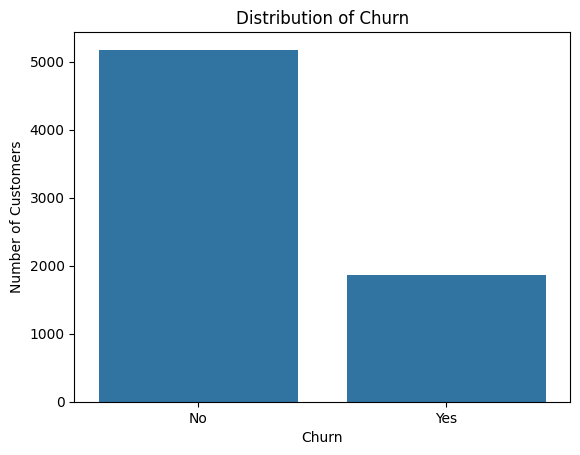

In [26]:
#Visualizing the data
import seaborn as sns
import matplotlib.pyplot as plt

#Visualizing the distribution of the target variable(churn)
sns.countplot(x='Churn', data=df)   
plt.title('Distribution of Churn')
plt.ylabel("Number of Customers")
plt.xlabel("Churn")
plt.show()




['Gender', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']


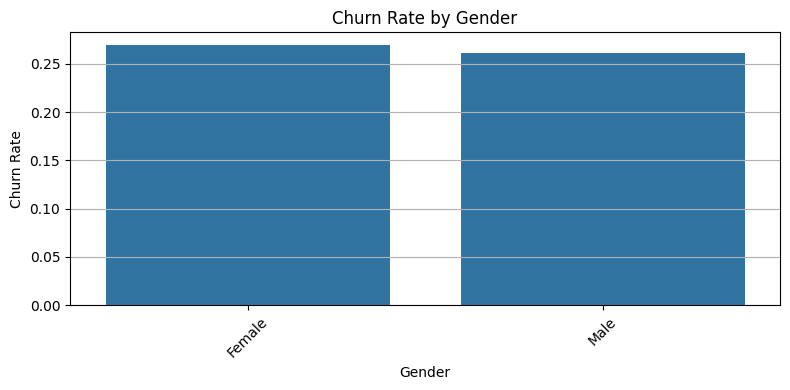

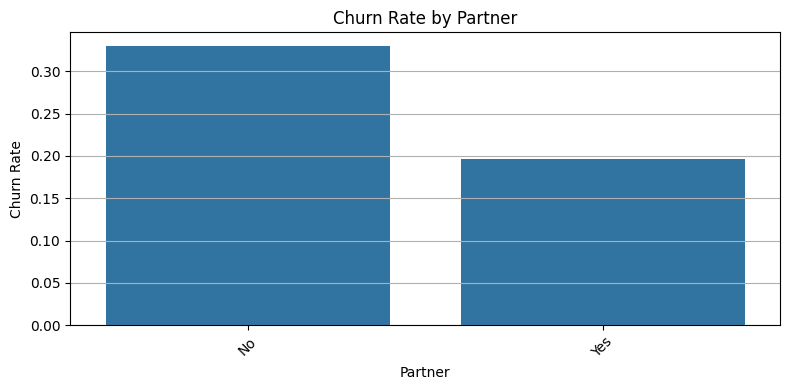

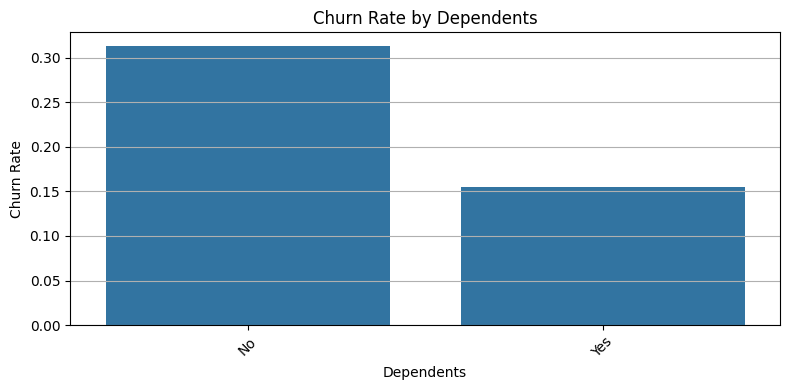

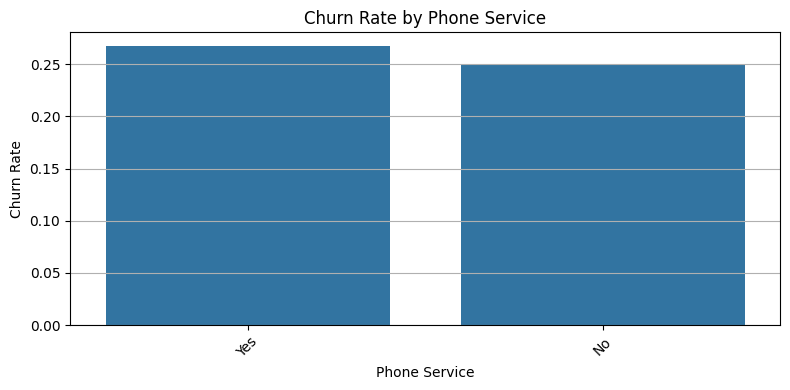

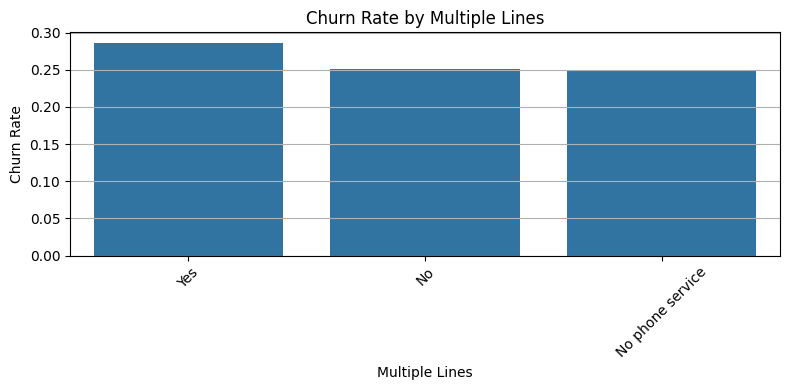

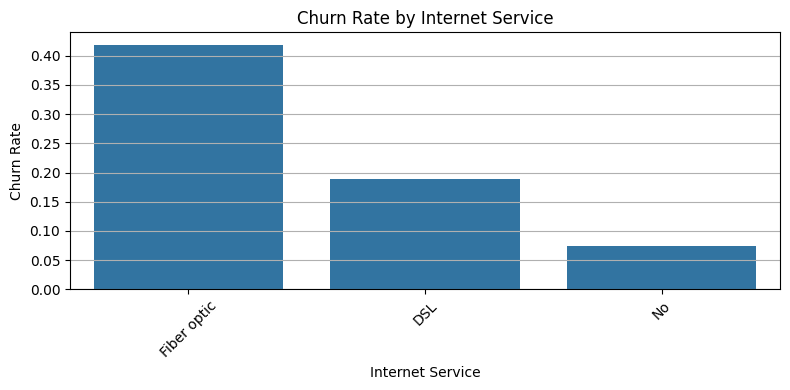

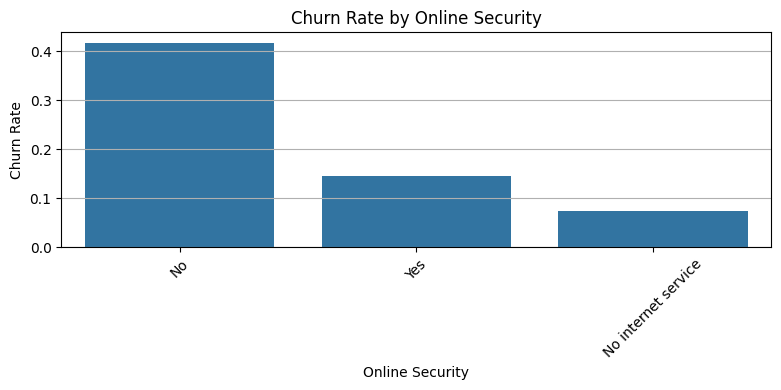

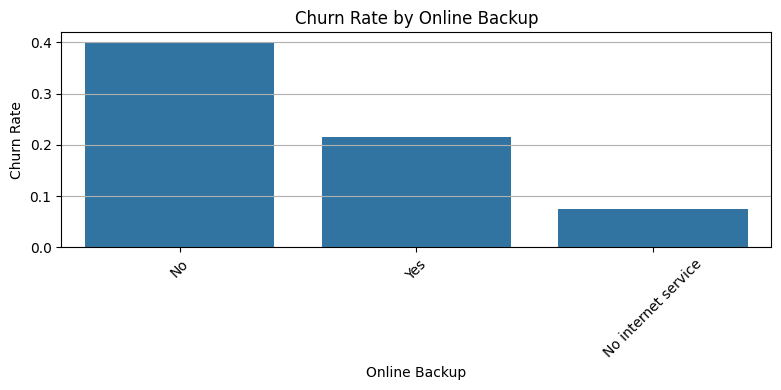

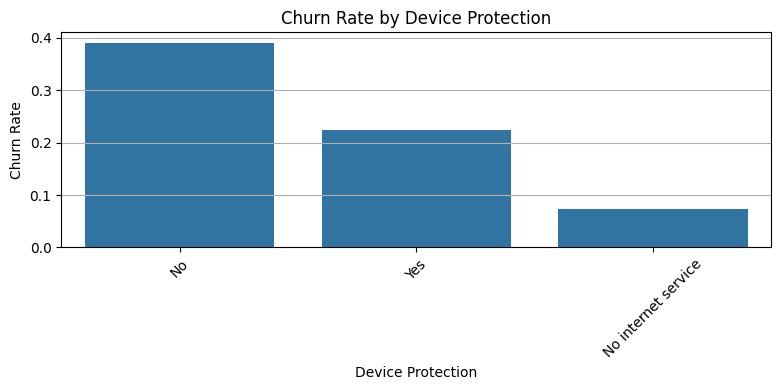

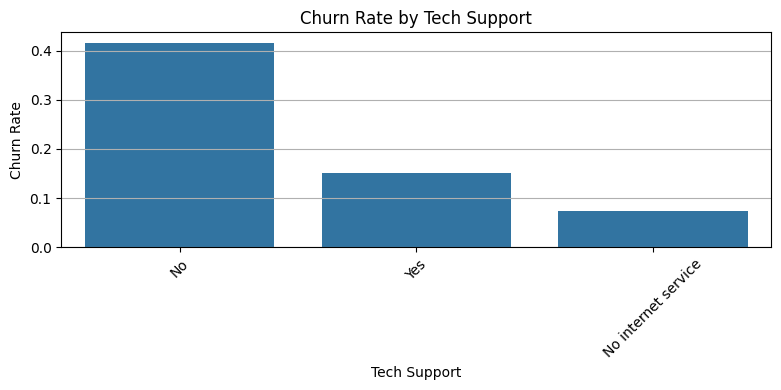

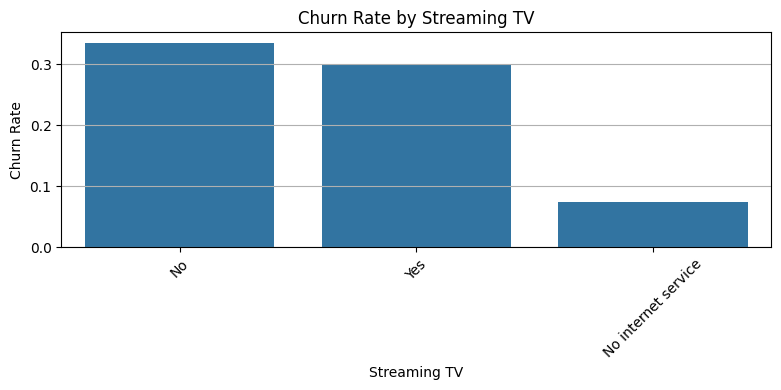

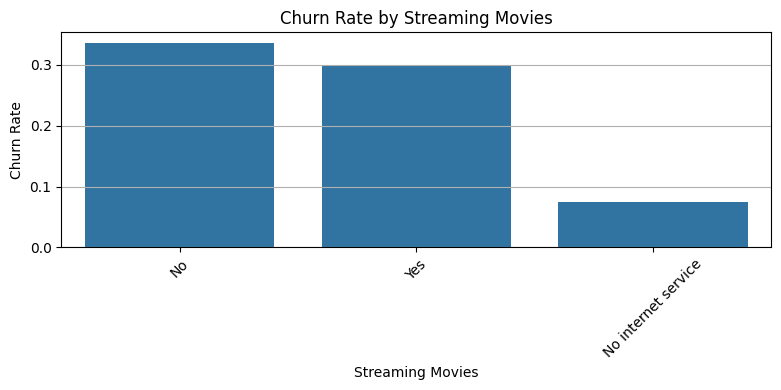

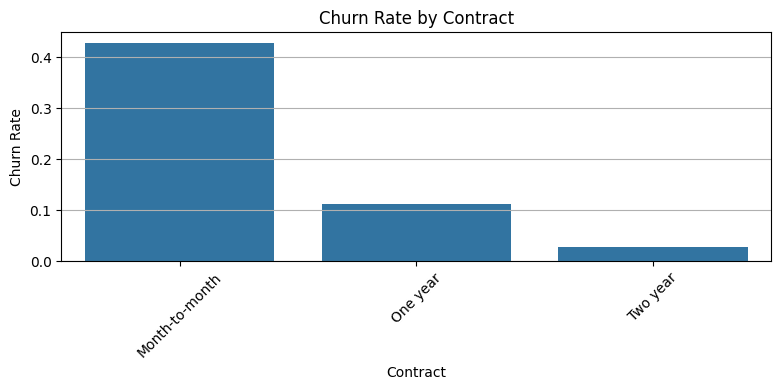

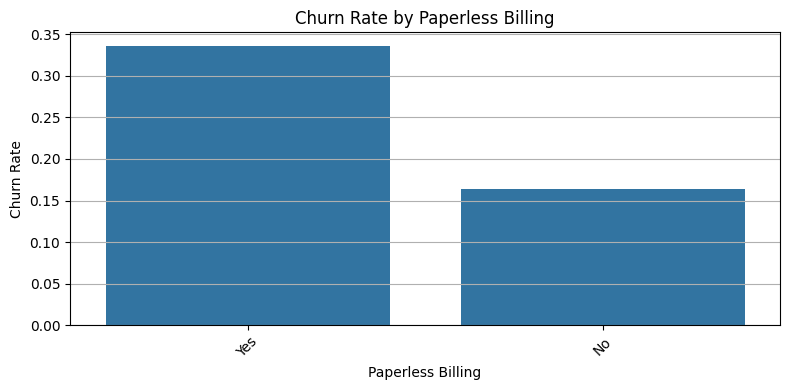

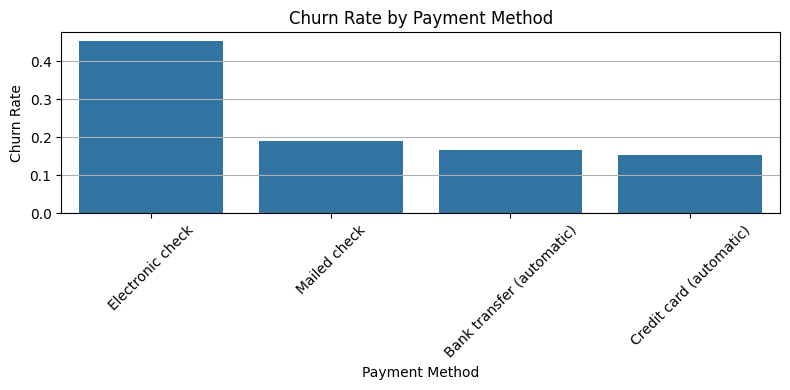

In [35]:
#Churn rate by Categorical Features(Non-numerical)
#Getting Categorical Columns;
categorical_cols=df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Churn')
categorical_cols.remove('Customer ID')
categorical_cols.remove('Total Charges')

print(categorical_cols)

#Coverting churn to binary
df["Churn_binary"]=df["Churn"].apply(lambda x:1 if x=="Yes"else 0)

#Function to plot churn rate according to feature
def plot_churn_rate_by_feature(feature):
    churn_rate=df.groupby(feature)['Churn_binary'].mean().sort_values(ascending=False)
    plt.figure(figsize=(8,4))
    sns.barplot(x=churn_rate.index,y=churn_rate.values)
    plt.title(f"Churn Rate by {feature}")
    plt.ylabel("Churn Rate")
    plt.xlabel(f"{feature}")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
    
#plotting for categorical columns
for feature in categorical_cols:
    plot_churn_rate_by_feature(feature)


In [ ]:
#Churn Rate by numerical features